In [77]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, Panel
import csv
import matplotlib.pyplot as plt

import sklearn
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss

In [4]:
raw_impression=pd.read_pickle('../data/processed/joined_impressions.pkl')

In [5]:
df = raw_impression.dropna(subset=['contentId', 'frontPageViewId','contentPosition'], how= 'all')

# basic click models 
### 1. Random clicked models

In [6]:
df.isClicked.sum()/len(df)

0.02441861737002657

### 2. Rank based CTR model

In [7]:
rctrdf = df.groupby('contentPosition').aggregate({'isClicked': sum, 'frontPageViewId': len})
rctrdf['probability'] = rctrdf.isClicked.fillna(0)/rctrdf.frontPageViewId
rctrdf

,isClicked,frontPageViewId,probability
contentPosition,,,
1,4696.0,108390,0.043325
2,3746.0,85886,0.043616
3,3338.0,83566,0.039944
4,2979.0,78900,0.037757
5,2354.0,70292,0.033489
6,2215.0,67533,0.032799
7,1820.0,60681,0.029993
8,1595.0,58451,0.027288
9,1366.0,52269,0.026134


### 3. Position-based model

In [8]:
pbmdf = pd.DataFrame((df.groupby('contentPosition').aggregate({'frontPageViewId': len})).frontPageViewId)/(df.frontPageViewId.nunique())
pbmdf = pbmdf.rename(columns={'frontPageViewId':'PEr'})
pbmdf2 = df.groupby('contentId').aggregate({'isClicked':sum , 'frontPageViewId':len})
pbmdf2['PAu'] = pbmdf2.isClicked.fillna(0)/pbmdf2.frontPageViewId
pbmdf2 = pd.DataFrame(pbmdf2.PAu)
pbmdf3 = df.groupby(['contentId','contentPosition']).aggregate({'isClicked':sum})
pbmdfall = pbmdf3.join(pbmdf, how='outer')
pbmdfall = pbmdfall.join(pbmdf2,how='outer')
pbmdfall['PCu'] = pbmdfall.PEr*pbmdfall.PAu
pbmdfall

isClicked       PEr       PAu       PCu
contentId contentPosition                                         
014kG     1                     22.0  0.828315  0.023134  0.019163
          2                      1.0  0.656340  0.023134  0.015184
          3                      3.0  0.638610  0.023134  0.014774
          4                      2.0  0.602953  0.023134  0.013949
          5                      8.0  0.537171  0.023134  0.012427
          6                      1.0  0.516086  0.023134  0.011939
          7                      3.0  0.463723  0.023134  0.010728
          8                      2.0  0.446682  0.023134  0.010334
          9                      4.0  0.399439  0.023134  0.009241
          10                     2.0  0.387915  0.023134  0.008974
          11                     0.0  0.365501  0.023134  0.008456
          12                     0.0  0.344310  0.023134  0.007965
          13                     0.0  0.325656  0.023134  0.007534
          14                     2.0  0.307376  0.023134  0.007111
          15                     2.0  0.290869  0.023134  0.006729
          16                     0.0  0.262135  0.023134  0.006064
          17                     4.0  0.254341  0.023134  0.005884
          18                     1.0  0.241533  0.023134  0.005588
          19                     0.0  0.227846  0.023134  0.005271
          20                     3.0  0.215153  0.023134  0.004977
          21                     2.0  0.204324  0.023134  0.004727
          22                     1.0  0.193388  0.023134  0.004474
          23                     0.0  0.175208  0.023134  0.004053
          24                     1.0  0.169813  0.023134  0.003929
          25                     2.0  0.161200  0.023134  0.003729
          26                     3.0  0.152863  0.023134  0.003536
          27                     0.0  0.145343  0.023134  0.003362
          28                     0.0  0.138633  0.023134  0.003207
          29                     3.0  0.131717  0.023134  0.003047
          30                     1.0  0.125879  0.023134  0.002912
...                              ...       ...       ...       ...
zqr84     39                     0.0  0.078575  0.007776  0.000611
          40                     0.0  0.075190  0.007776  0.000585
          41                     0.0  0.072622  0.007776  0.000565
          42                     0.0  0.067181  0.007776  0.000522
          43                     0.0  0.065668  0.007776  0.000511
          44                     0.0  0.063772  0.007776  0.000496
          45                     1.0  0.061373  0.007776  0.000477
          46                     0.0  0.059546  0.007776  0.000463
          47                     0.0  0.057399  0.007776  0.000446
          48                     0.0  0.053654  0.007776  0.000417
          49                     0.0  0.052325  0.007776  0.000407
          50                     0.0  0.050903  0.007776  0.000396
          51                     0.0  0.049298  0.007776  0.000383
          52                     0.0  0.047663  0.007776  0.000371
          53                     0.0  0.045844  0.007776  0.000356
          54                     0.0  0.042879  0.007776  0.000333
          55                     0.0  0.042191  0.007776  0.000328
          56                     0.0  0.040854  0.007776  0.000318
          58                     1.0  0.038034  0.007776  0.000296
          60                     0.0  0.035008  0.007776  0.000272
          61                     0.0  0.033846  0.007776  0.000263
zqrQr     1                     44.0  0.828315  0.038690  0.032048
          2                     57.0  0.656340  0.038690  0.025394
          3                     14.0  0.638610  0.038690  0.024708
          10                     0.0  0.387915  0.038690  0.015009
          12                     0.0  0.344310  0.038690  0.013322
          16                     0.0  0.262135  0.038690  0.010142
       

### 4. COEC model

In [9]:
coecdf = df.groupby(['environmentId','contentId','contentPosition']).aggregate({'frontPageViewId':len,'isClicked':len})
coecdf = coecdf.rename(columns={'isClicked':'examination', 'frontPageViewId':'impressions'})
coecdf['Beta']=coecdf['examination'].fillna(0)/coecdf['impressions']
coecdf2 = df.groupby('contentId').aggregate({'isClicked':sum})
coecdf = coecdf.reset_index()
coecdf1 = coecdf.groupby(['contentId']).aggregate({'Beta':sum})
coecdf3 = coecdf2.join(coecdf1, how='outer')
coecdf3['Alpha'] = coecdf3.isClicked.fillna(0)/coecdf3.Beta

In [10]:
coecdf3

,isClicked,Beta,Alpha
contentId,,,
014kG,93.0,3698.0,0.025149
014mo,2.0,349.0,0.005731
01E30,18.0,829.0,0.021713
01EAg,31.0,2021.0,0.015339
01EVA,10.0,736.0,0.013587
01Eyg,18.0,480.0,0.037500
01Gko,31.0,2930.0,0.010580
01Gq2,12.0,180.0,0.066667
01K4E,0.0,78.0,0.000000


# Evaluation
# 1. Random clicked models
### Use Mean-Square-Error method

In [28]:
rcm_mse = df[['contentId', 'contentPosition', 'isClicked']]
rcm_mse['predicted'] = 0.02441861737002657
rcm_mse['evaluation'] = rcm_mse.isClicked-rcm_mse.predicted
rcm_mse['square'] = rcm_mse.evaluation**2
rcm_mse_result = rcm_mse.square.sum()/len(rcm_mse)
rcm_mse_result

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

0.023822348495447808

### evaluation use log loss

In [29]:
rcm_lls = df[['contentId', 'contentPosition', 'isClicked']]
rcm_lls['predicted'] = 0.02441861737002657
rcm_lls['predicted_non'] = 1-0.02441861737002657

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
rcm_lls

,contentId,contentPosition,isClicked,predicted,predicted_non
0,4p569,15,0.0,0.024419,0.975581
1,QeeO4,4,1.0,0.024419,0.975581
2,MyGjr,16,0.0,0.024419,0.975581
3,undefined,17,0.0,0.024419,0.975581
4,dV58X,18,0.0,0.024419,0.975581
6,84zpQ,1,0.0,0.024419,0.975581
7,99l4W,19,0.0,0.024419,0.975581
8,nqg9Q,20,0.0,0.024419,0.975581
9,EVob5,21,0.0,0.024419,0.975581
10,78EJ4,1,0.0,0.024419,0.975581


In [35]:
y_true_rcm=rcm_lls.isClicked.tolist()
rcm = list(zip(rcm_lls.predicted, rcm_lls.predicted_non))
y_pred_rcm = [list(i) for i in rcm]
rcm_lls_result = sklearn.metrics.log_loss(y_true_rcm, y_pred_rcm)
rcm_lls_result

3.6223611948793408

### evaluation use AUC

In [36]:
rcm_auc = df[['contentId', 'contentPosition', 'isClicked']]
rcm_auc['predicted'] = 0.02441861737002657

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
rcm_auc

,contentId,contentPosition,isClicked,predicted
0,4p569,15,0.0,0.024419
1,QeeO4,4,1.0,0.024419
2,MyGjr,16,0.0,0.024419
3,undefined,17,0.0,0.024419
4,dV58X,18,0.0,0.024419
6,84zpQ,1,0.0,0.024419
7,99l4W,19,0.0,0.024419
8,nqg9Q,20,0.0,0.024419
9,EVob5,21,0.0,0.024419
10,78EJ4,1,0.0,0.024419


In [105]:
metrics.roc_auc_score(y_true=rcm_auc.isClicked, y_score=rcm_auc.predicted)

0.5

In [106]:
fpr_rcm, tpr_rcm, thresholds_rcm = roc_curve(
    y_true=rcm_auc.isClicked,
    y_score=rcm_auc.predicted)

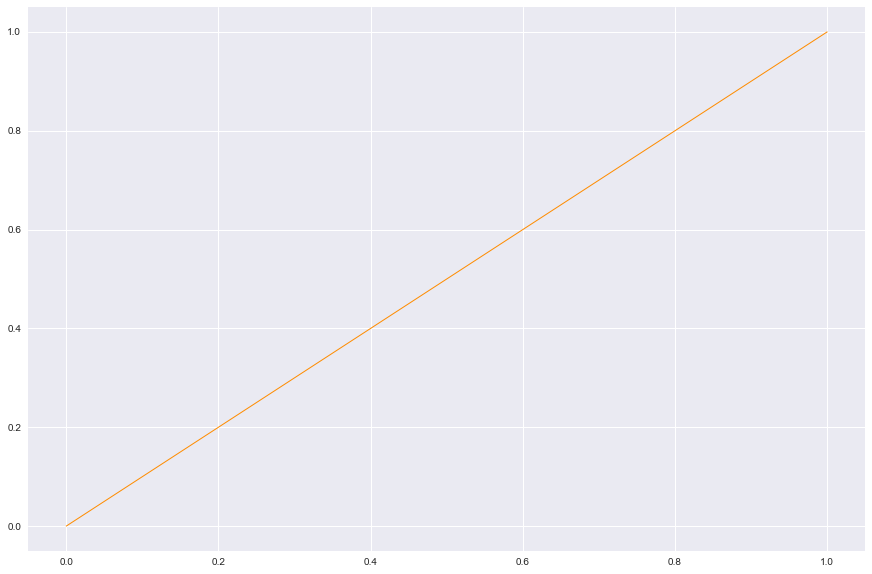

In [107]:
plt.plot(fpr_rcm, tpr_rcm, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))

plt.show()

# 2. Rank based CTR model
### Use Mean-Square-Error method

In [50]:
rctr_mse = df[['contentId', 'contentPosition', 'isClicked']].set_index(['contentPosition']).join(rctrdf.probability)
rctr_mse['evaluation'] = rctr_mse.isClicked-rctr_mse.probability
rctr_mse['square'] = rctr_mse.evaluation**2
rctr_mse_result = rctr_mse.square.sum()/len(rctr_mse)
rctr_mse_result

0.023693725571433687

### evaluation use log loss

In [53]:
rctr_lls = df[['contentId', 'contentPosition', 'isClicked']].set_index(['contentPosition']).join(rctrdf.probability)
rctr_lls['predicted_non'] = 1-rctr_lls.probability
rctr_lls

,contentId,isClicked,probability,predicted_non
contentPosition,,,,
1,84zpQ,0.0,0.043325,0.956675
1,78EJ4,0.0,0.043325,0.956675
1,2W1Vl,0.0,0.043325,0.956675
1,84zpQ,0.0,0.043325,0.956675
1,84zpQ,0.0,0.043325,0.956675
1,78EJ4,0.0,0.043325,0.956675
1,84zpQ,0.0,0.043325,0.956675
1,84zpQ,0.0,0.043325,0.956675
1,2W1Vl,0.0,0.043325,0.956675


In [55]:
y_true_rctr = rctr_lls.isClicked.tolist()
rctr = list(zip(rctr_lls.probability, rctr_lls.predicted_non))
y_pred_rctr = [list(i) for i in rctr]
rctr_lls_result = sklearn.metrics.log_loss(y_true_rctr, y_pred_rctr)
rctr_lls_result

3.7364502080613224

### evaluation use AUC

In [108]:
rctr_auc = df[['contentId', 'contentPosition', 'isClicked']].set_index(['contentPosition']).join(rctrdf.probability)
metrics.roc_auc_score(y_true=rctr_auc.isClicked, y_score=rctr_auc.probability)

0.63410102342143082

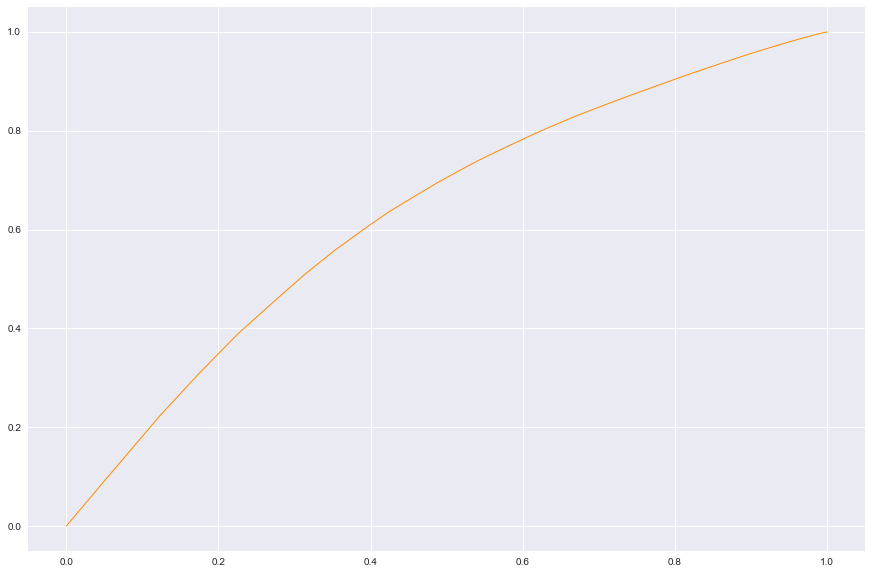

In [109]:
fpr_rctr, tpr_rctr, thresholds_rctr = roc_curve(
    y_true=rctr_auc.isClicked,
    y_score=rctr_auc.probability)
plt.plot(fpr_rctr, tpr_rctr, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))

plt.show()

#  3. Position-based model

In [62]:
pbm_eva_df = df[['contentId', 'contentPosition', 'isClicked']].set_index(['contentId','contentPosition']).join(pbmdfall.PCu)
pbm_eva_df['evaluation'] = pbm_eva_df.isClicked - pbm_eva_df.PCu
pbm_eva_df['square'] = pbm_eva_df.evaluation**2
pbm_eva_df['predicted_non'] = 1 - pbm_eva_df.PCu

In [63]:
pbm_eva_df

isClicked       PCu  evaluation    square  \
contentId contentPosition                                              
014kG     1                      1.0  0.019163    0.980837  0.962042   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      1.0  0.019163    0.980837  0.962042   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
          1                      0.0  0.019163   -0.019163  0.000367   
...                              ...       ...         ...       ...   
zqrQr     18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.000087   
          18                     0.0  0.009345   -0.009345  0.00008

### Use Mean-Square-Error method

In [65]:
pbm_mse_result = pbm_eva_df.square.sum()/len(pbm_eva_df)
pbm_mse_result

0.023773596651354204

### evaluation use log loss

In [66]:
y_true_pbm = pbm_eva_df.isClicked.tolist()
pbm = list(zip(pbm_eva_df.PCu, pbm_eva_df.predicted_non))
y_pred_pbm = [list(i) for i in pbm]
pbm_lls_result = sklearn.metrics.log_loss(y_true_pbm, y_pred_pbm)
pbm_lls_result

5.4306165808648039

### evaluation use AUC

In [110]:
metrics.roc_auc_score(y_true=pbm_eva_df.isClicked, y_score=pbm_eva_df.PCu)

0.69236971704441075

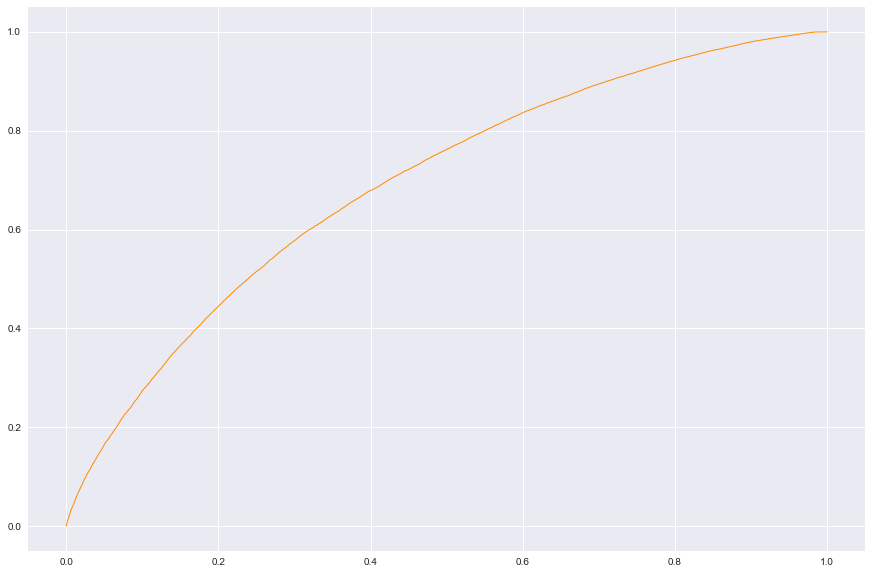

In [111]:
fpr_pbm, tpr_pbm, thresholds_pbm = roc_curve(
    y_true=pbm_eva_df.isClicked,
    y_score=pbm_eva_df.PCu)
plt.plot(fpr_pbm, tpr_pbm, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))

plt.show()

### 4. COEC model

In [71]:
coec_eva_df = df[['contentId', 'contentPosition', 'isClicked']].set_index(['contentId']).join(coecdf3.Alpha)


In [72]:
coec_eva_df

,contentPosition,isClicked,Alpha
contentId,,,
014kG,1,1.0,0.025149
014kG,1,0.0,0.025149
014kG,1,0.0,0.025149
014kG,1,0.0,0.025149
014kG,1,0.0,0.025149
014kG,1,0.0,0.025149
014kG,1,0.0,0.025149
014kG,1,0.0,0.025149
014kG,1,0.0,0.025149


In [113]:
metrics.roc_auc_score(y_true=coec_eva_df.isClicked, y_score=coec_eva_df.Alpha)

0.67742671866588933

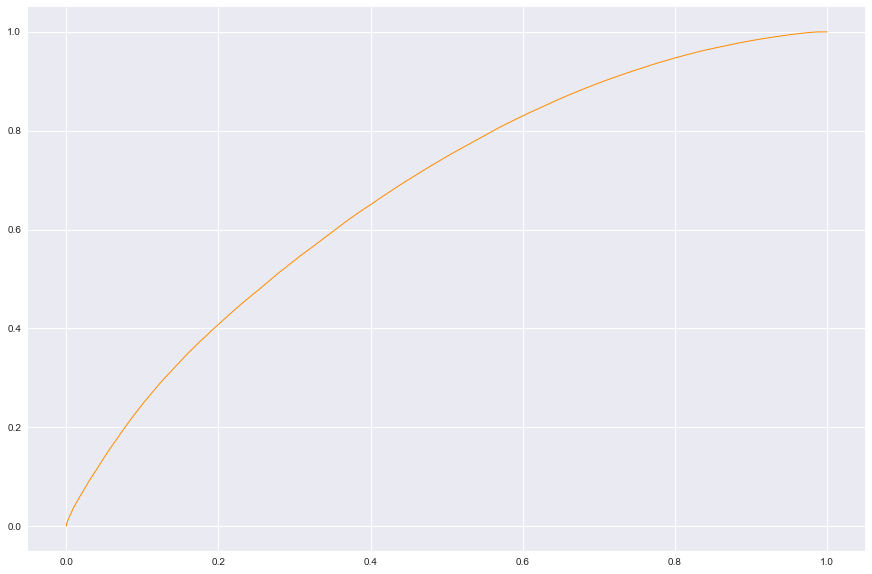

In [114]:
fpr_coec, tpr_coec, thresholds_coec = roc_curve(
    y_true=coec_eva_df.isClicked,
    y_score=coec_eva_df.Alpha)

plt.plot(fpr, tpr, color='darkorange',
         lw=1, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))

plt.show()

 # results

In [75]:
print ("Mean-Square-Error method :")
print("Random clicked models %s" % rcm_mse_result)
print("Rank based CTR model %s" % rctr_mse_result)
print("Position-based model %s" % pbm_mse_result)

Mean-Square-Error method :
Random clicked models 0.023822348495447808
Rank based CTR model 0.023693725571433687
Position-based model 0.023773596651354204


In [76]:
print ("Log Loss method :")
print("Random clicked models %s" % rcm_lls_result)
print("Rank based CTR model %s" % rctr_lls_result)
print("Position-based model %s" % pbm_lls_result)

Log Loss method :
Random clicked models 3.62236119488
Rank based CTR model 3.73645020806
Position-based model 5.43061658086


### AUC

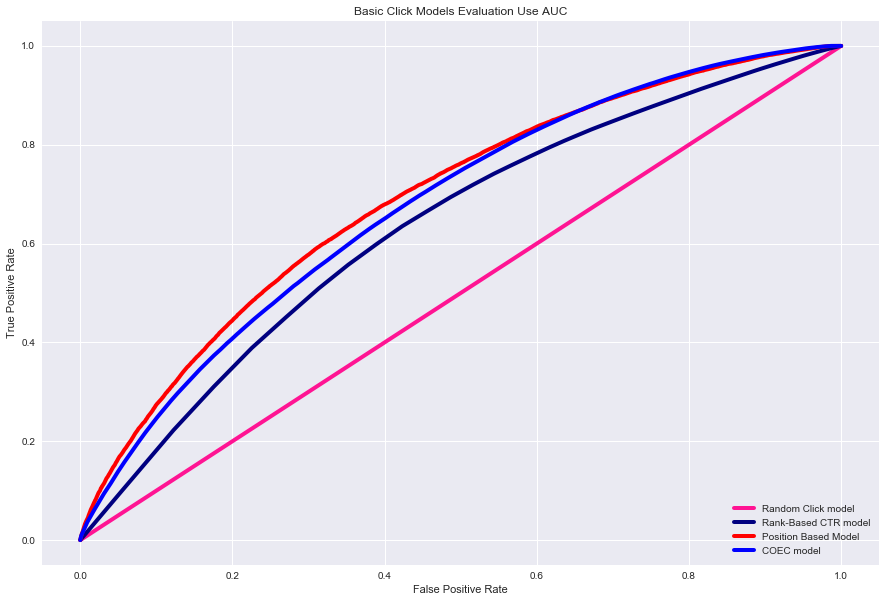

In [124]:
plt.figure()
plt.plot(fpr_rcm, tpr_rcm,
         label='Random Click model',
         color='deeppink', linewidth=4)

plt.plot(fpr_rctr, tpr_rctr,
         label='Rank-Based CTR model',
         color='navy', linewidth=4)

plt.plot(fpr_pbm, tpr_pbm,
         label='Position Based Model',
         color='red', linewidth=4)

plt.plot(fpr_coec, tpr_coec,
         label='COEC model',
         color='blue', linewidth=4)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Basic Click Models Evaluation Use AUC')
plt.legend(loc="lower right")
plt.show()